# Course : Video edit

## Winter semister 2021-22

##### Christina Seventikidou

##### Tutor: L. Kontis

# $\color{green}{\text{Project 1 - 25%}}$ 

#### Part 1
Make a program for histogram equalization for two images. Display the results.
#### Part 2
Make a program that calculates the move between two images with phase correlation method. Display the results

## $\color{green}{\text{Part 1}}$ 


In [23]:
#imports
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image #with image we create image objects

### Load and plot the images:

In [33]:
img1 = Image.open('2.jpg')
img2 = Image.open('4.jpg')

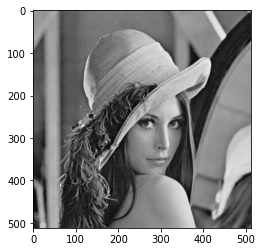

In [34]:
plt.imshow(img1,cmap='gray')

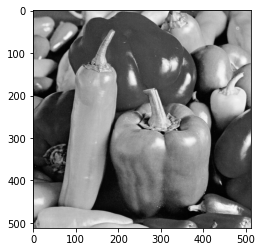

In [35]:
plt.imshow(img2,cmap='gray')

###### In order to process an image, we have to first read it as an array. 
Numpy will automatically return a multi-dimensional array, 
###### so we flatten it to a one-dimensional array.

In [37]:
img1 = np.asarray(img1)
img2 = np.asarray(img2)
print(img1.shape)
print(img2.shape)

(512, 512)
(512, 512)


They are 512x512 dimention arrays, 2d because they are grayscale.

In [38]:
flat1 = img1.flatten()
flat2 = img2.flatten()
flat1.shape

(262144,)

### Create and plot the histogram:

In [92]:
hist1,bins1 = np.histogram(flat1,bins = 256) 
hist2,bins2 = np.histogram(flat2,bins = 256) 

###### histogram for img1

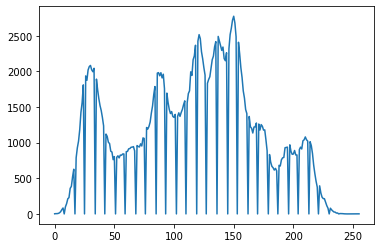

In [93]:
plt.plot(hist1)  # <- or here
plt.show()

(array([11496., 34359., 19911., 36493., 41663., 53404., 32682., 17287.,
        14572.,   277.]),
 array([ 22. ,  44.6,  67.2,  89.8, 112.4, 135. , 157.6, 180.2, 202.8,
        225.4, 248. ]),
 <BarContainer object of 10 artists>)

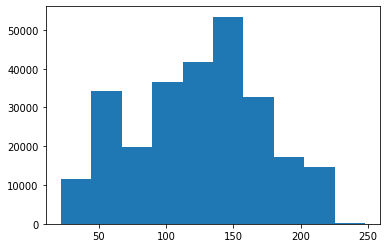

In [95]:
plt.hist(flat1)

##### histogram for img2

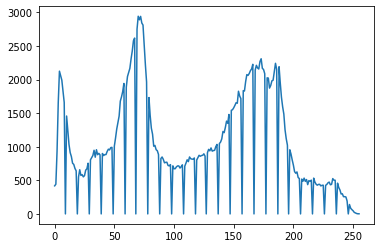

In [97]:
plt.plot(hist2)
plt.show()

(array([24342., 19950., 50244., 23684., 18304., 27778., 47035., 33898.,
        10884.,  6025.]),
 array([  0.,  23.,  46.,  69.,  92., 115., 138., 161., 184., 207., 230.]),
 <BarContainer object of 10 artists>)

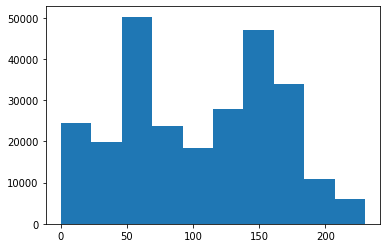

In [96]:
plt.hist(flat2)

## histogram equalization

Now we have the histogram, we can take the next step towards equalization by computing the cumulative sum of the histogram. The cumulative sum is — the sum of all values in the histogram up to that point, taking into account all previous values.

In [98]:
def cum_sum(a):
    b = np.zeros(a.shape)
    b[0]= a[0]
    for i in range(1,b.shape[0]):
        b[i]= a[i] + b[i-1]
    return np.array(b)

### Img1

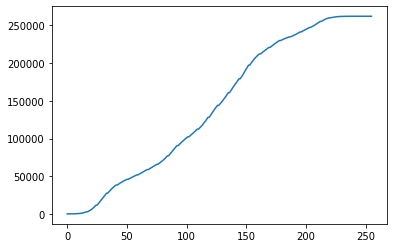

In [122]:
cs1 = cum_sum(hist1)
plt.plot(cs1)

we can see that the values are big. we have to normalize them to conform to a range of 0–255. Here’s one last formula: $$ s_{k}= \sum_{j=0}^{k} \frac{n_{j}}{n} $$

In [118]:
def normalization(cs):
    nj = (cs - cs.min()) * 255
    N = cs.max() - cs.min()
    cs = nj / N
    # cast it back to uint8 since we can't use floating point values in images
    cs = cs.astype('uint8')
    return cs

In [124]:
cs1=normalization(cs1)

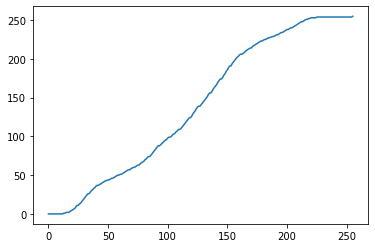

In [125]:
plt.plot(cs1)

(array([33., 27., 27., 17., 17., 13., 13., 13., 30., 66.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

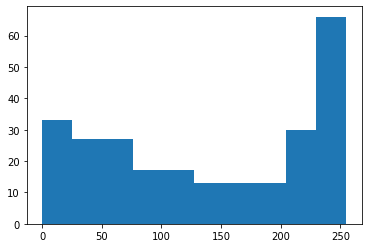

In [126]:
plt.hist(cs)

### Img2

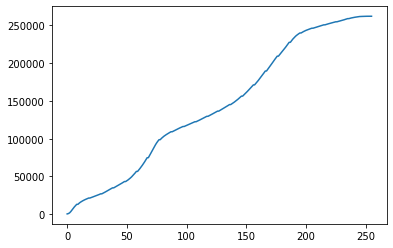

In [127]:
cs2 = cum_sum(hist2)
plt.plot(cs2)

In [130]:
cs2=normalization(cs2)

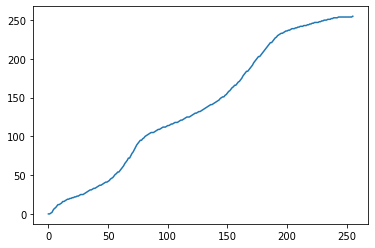

In [131]:
plt.plot(cs2)

(array([30., 26., 14., 13., 38., 27., 16., 14., 14., 64.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

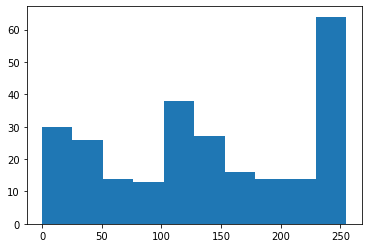

In [132]:
plt.hist(cs2)

## Image correction

We can now use the normalized cumulative sum to modify the intensity values of our original image. 

In [133]:
# get the value from cumulative sum for every index in flat, and set that as img_new
img_new_1 = cs[flat1]
img_new_2 = cs[flat2]

print(img_new_1.shape)
print(img_new_1.shape)

(262144,)
(262144,)


In [135]:
# put array back into original shape since we flattened it
img_new_1 = np.reshape(img_new_1, img1.shape)
img_new_2 = np.reshape(img_new_2, img2.shape)

img_new.shape

(512, 512)

### Display

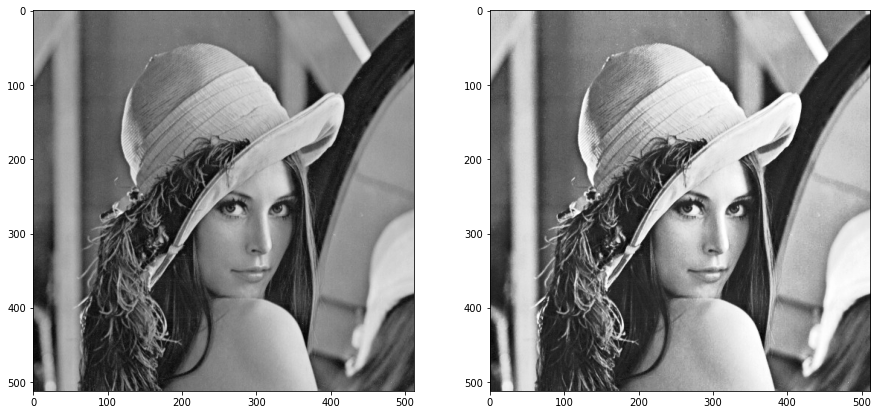

In [136]:
# side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img1, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(img_new, cmap='gray')

plt.show(block=True)

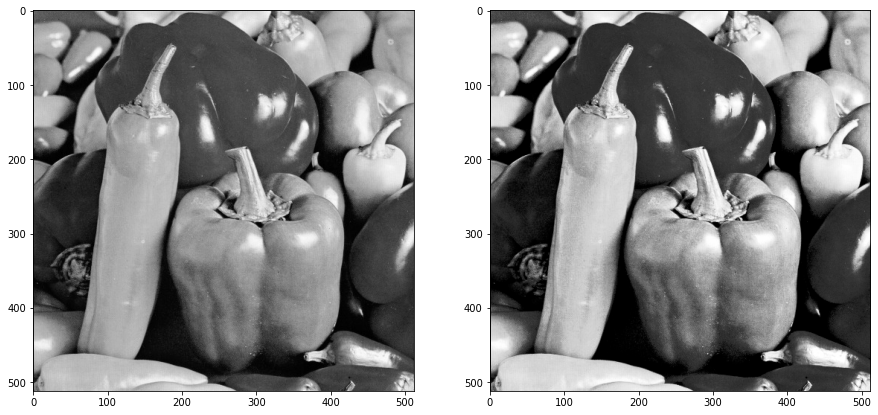

In [137]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img2, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(img_new_2, cmap='gray')

plt.show(block=True)

## $\color{green}{\text{Part 2}}$ 


Phase correlation is an approach to estimate the relative translative offset between two similar images. It is commonly used in image registration and relies on a frequency-domain representation of the data, usually calculated by fast Fourier transforms. 

In [189]:
img1 = Image.open('cameraman.jpg')
img2 = Image.open('cameraman2.jpg')

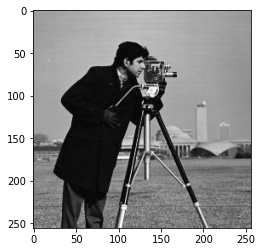

In [190]:
plt.imshow(img1,cmap='gray')

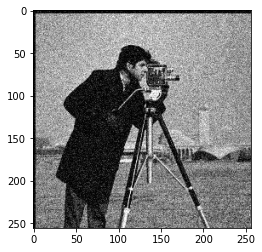

In [191]:
plt.imshow(img2,cmap='gray')

We see that the image is moved a little bit.

In [192]:
#make images 2d np arrays
img1 = np.asarray(img1)
img2 = np.asarray(img2)

### Algorithm

#### 1. Calculate discrete 2D Fourier transform of both images. 

#### 2. Calculate the cross-power spectrum by taking the complex conjugate of the second result, multiplying the Fourier transforms together elementwise, and normalizing this product elementwise.

#### 3. Obtain the normalized cross-correlation by applying the inverse Fourier transform.

#### 4.  Determine the location of the peak in r

In [193]:
def phase_correlation(a, b):
    Ga = np.fft.fft2(a)
    Gb = np.fft.fft2(b)
    conj_b = np.ma.conjugate(Gb)
    R = Ga*conj_b
    R /= np.absolute(R)
    r = np.fft.ifft2(R).real
    return r

In [194]:
corrimg = phase_correlation(img2, img1)

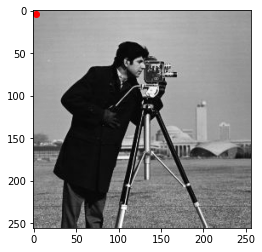

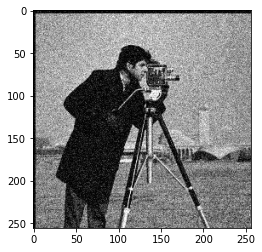

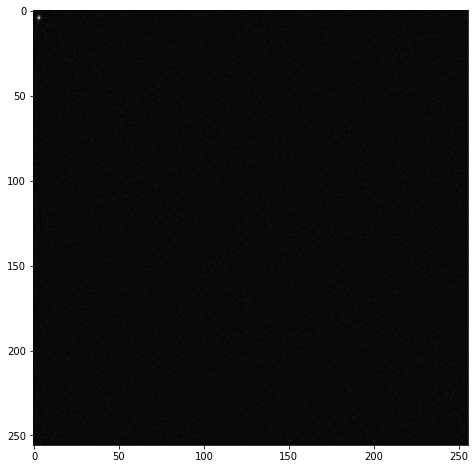

In [195]:
r,c = np.unravel_index(corrimg.argmax(), corrimg.shape) #location of max element

plt.imshow(img1, cmap='gray')
plt.plot([c],[r],'ro')
plt.show()

plt.imshow(img2, cmap='gray')
plt.show()

plt.figure(figsize=[8,8])
plt.imshow(corrimg, cmap='gray')

plt.show()

In [196]:
r,c 

(4, 3)